<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Derivative_Pricing_Binomial_European.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

## Binomial Tree :

* Binomial tree Basics Implementation
* European Call option
* European Put Option
* Put-call Parity
* Delta Hedging
* Volatility Adusting

In [4]:
def binomial_tree(S_o, T, u, d, N):
  S = np.zeros([N+1, N+1])

  for i in range (0, N+1):
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return S

In [5]:
stock = binomial_tree(100, 1, 1.2, 0.8, 2)
stock

array([[100.,   0.,   0.],
       [ 80., 120.,   0.],
       [ 64.,  96., 144.]])

In [6]:
# Binomial Tree with call_payoff

def binomial_tree_call(S_o, K, T, u, d, N):
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0, N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return S, C


In [7]:
Stock, Call = binomial_tree_call(100, 90, 10, 1.2, 0.8, 10)
print("Underlying Price Evolution:\n", Stock)
print("\n")
print("Call Option Payoff:\n", Call)

Underlying Price Evolution:
 [[100.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 80.         120.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 64.          96.         144.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 51.2         76.8        115.2        172.8          0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 40.96        61.44        92.16       138.24       207.36
    0.           0.           0.           0.           0.
    0.        ]
 [ 32.768       49.152       73.728      110.592      165.888
  248.832        0.           0.           0.           0.
    0.        ]
 [ 26.2144      39.3216      58.9824      88.4736     132.7104
  199.0656     298.5984       0.           0.           0.
    0.        ]
 [ 20.97152     31.45728

In [8]:
# Binomial Risk-neutral Probabilities and backward induction of call option value.

def binomial_call_full(S_o, K, T, r, u, d, N):
  dt = T / N
  p = (np.exp(r*dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0 , N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return C[0,0], C, S

In [9]:
call_price, C, S = binomial_call_full(100, 90, 10, 0, 1.2, 0.8, 10)
print("Underlying Price Evolution:\n", S)
print("\n")
print("Call Option Payoff:\n", C)
print("\n")
print("Call Option Price at t=0: ", "{:.2f}".format(call_price))

Underlying Price Evolution:
 [[100.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 80.         120.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 64.          96.         144.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 51.2         76.8        115.2        172.8          0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 40.96        61.44        92.16       138.24       207.36
    0.           0.           0.           0.           0.
    0.        ]
 [ 32.768       49.152       73.728      110.592      165.888
  248.832        0.           0.           0.           0.
    0.        ]
 [ 26.2144      39.3216      58.9824      88.4736     132.7104
  199.0656     298.5984       0.           0.           0.
    0.        ]
 [ 20.97152     31.45728

In [10]:
# Binomial Put Option Full with Risk-neutral Probabilities and backward induction of call option value.

def binomial_put_full(S_o, K, T, r, u, d, N):
  dt = T / N
  p = (np.exp(r * dt) - d) / (u - d)
  P = np.zeros([N + 1, N + 1])
  S = np.zeros([N + 1, N + 1])

  for i in range(0, N + 1):
    P[N, i] = max(K - (S_o * (u ** (i)) * (d ** (N-i))), 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return P[0, 0], P, S

In [11]:
put_price, P, S = binomial_put_full(36, 36, 50, 0.01, 1.1, 0.7, 50)
print("Underlying Price Evolution:\n", S)
print("\n")
print("put Option Payoff:\n", P)
print("\n")
print("Put Option Price at t=0: ", "{:.2f}".format(put_price))

Underlying Price Evolution:
 [[3.60000000e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.52000000e+01 3.96000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76400000e+01 2.77200000e+01 4.35600000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.32132126e-06 2.07636197e-06 3.26285453e-06 ... 3.49262042e+03
  0.00000000e+00 0.00000000e+00]
 [9.24924879e-07 1.45345338e-06 2.28399817e-06 ... 2.44483429e+03
  3.84188246e+03 0.00000000e+00]
 [6.47447415e-07 1.01741737e-06 1.59879872e-06 ... 1.71138400e+03
  2.68931772e+03 4.22607070e+03]]


put Option Payoff:
 [[ 7.5822903   0.          0.         ...  0.          0.
   0.        ]
 [ 9.54336876  7.11166527  0.         ...  0.          0.
   0.        ]
 [11.63290642  9.06090302  6.63837335 ...  0.          0.
   0.        ]
 ...
 [35.28715092 35.28715016 35.28714898 ...  0.          0.
   0.        ]
 [35.64179309 35.64179256 35.64179173 ...  0.       

In [12]:
# Put-Call parity

put_price, P, S = binomial_put_full(100, 90, 10, 0, 1.2, 0.8, 10)
print("Price at t=0 for Put option is $", "{:.2f}".format(put_price))
call_price, C, S = binomial_call_full(100, 90, 10, 0, 1.2, 0.8, 10)
print("Price at t=0 for Call option is $", "{:.2f}".format(call_price))

Price at t=0 for Put option is $ 19.38
Price at t=0 for Call option is $ 29.38


In [13]:
# Parity Check

round(call_price + 90 * np.exp(-0 * 1), 2) == round(S[0, 0] + put_price, 2)

True

In [14]:
put_price, P, S = binomial_put_full(100, 90, 1, 0, 1.2, 0.8, 2)
print("Price at t=0 for Put option is $", "{:.2f}".format(put_price))
call_price, C, S = binomial_call_full(100, 90, 1, 0, 1.2, 0.8, 2)
print("Price at t=0 for Call option is $", "{:.2f}".format(call_price))

Price at t=0 for Put option is $ 6.50
Price at t=0 for Call option is $ 16.50


In [15]:
round(call_price + 90 * np.exp(-0 * 1), 2) == round(S[0, 0] + put_price, 2)

True

In [16]:
print("Underlying Price Evolution:\n", S)
print("Call Option Payoff:\n", C)
print("Put Option Payoff:\n", P)

Underlying Price Evolution:
 [[100.   0.   0.]
 [ 80. 120.   0.]
 [ 64.  96. 144.]]
Call Option Payoff:
 [[16.5  0.   0. ]
 [ 3.  30.   0. ]
 [ 0.   6.  54. ]]
Put Option Payoff:
 [[ 6.5  0.   0. ]
 [13.   0.   0. ]
 [26.   0.   0. ]]


In [17]:
round(C[1, 0] + 90 * np.exp(-0 * 0.5), 2) == round(S[1, 0] + P[1, 0], 2)

True

In [18]:
n = 5

for i in range(n):

  for j in range(i, n):
    print(' ', end=' ')

  for j in range(i+1):
    print('*', end=' ')

  print()

          * 
        * * 
      * * * 
    * * * * 
  * * * * * 


In [19]:
n = 5

for i in range(n):

  for j in range(i+1):
    print(' ', end=' ')

  for j in range(i, n):
    print('*', end=' ')


  print()

  * * * * * 
    * * * * 
      * * * 
        * * 
          * 


In [20]:
n = 5

for i in range(n):

  for j in range(i, n):
    print(' ', end=' ')

  for j in range(i):
    print('*', end=' ')

  for j in range(i+1):
    print('*', end=' ')

  print()

          * 
        * * * 
      * * * * * 
    * * * * * * * 
  * * * * * * * * * 


In [21]:
n = 5

for i in range(n):

  for j in range(i+1):
    print(' ', end=' ')

  for j in range(i, n-1):
    print('*', end=' ')

  for j in range(i, n):
    print('*', end=' ')


  print()

  * * * * * * * * * 
    * * * * * * * 
      * * * * * 
        * * * 
          * 


In [22]:
n = 5

for i in range(n-1):

  for j in range(i, n):
    print(' ', end=' ')

  for j in range(i):
    print('*', end=' ')

  for j in range(i+1):
    print('*', end=' ')

  print()

for i in range(n):

  for j in range(i+1):
    print(' ', end=' ')

  for j in range(i, n-1):
    print('*', end=' ')

  for j in range(i, n):
    print('*', end=' ')


  print()

          * 
        * * * 
      * * * * * 
    * * * * * * * 
  * * * * * * * * * 
    * * * * * * * 
      * * * * * 
        * * * 
          * 


In [23]:
# Delta hedging Call Binomial tree

def binomial_call_delta(S_o, K, T, r, u, d, N):
  dt = T / N
  p = (np.exp(r*dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  Delta = np.zeros([N, N])

  for i in range(0 , N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      Delta[j, i] = (C[j+1, i+1] - C[j+1, i]) / (S[j+1, i+1] - S[j+1, i])

  return C[0,0], C, S, Delta

In [24]:
price, call, S, delta = binomial_call_delta(100, 90, 15, 0, 1.2, 0.8, 15)
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[ 100.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  80.          120.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  64.           96.          144.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  51.2          76.8         115.2         172.8           0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  40.96         61.44         92.16        138.24        207.36
     0.            0.            0.            0.            0.
     0.            0

In [26]:
price, call, S, delta = binomial_call_delta(100, 90, 10, 0, 1.2, 0.8, 4)
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[100.     0.     0.     0.     0.  ]
 [ 80.   120.     0.     0.     0.  ]
 [ 64.    96.   144.     0.     0.  ]
 [ 51.2   76.8  115.2  172.8    0.  ]
 [ 40.96  61.44  92.16 138.24 207.36]]
Call Price: 
 [[ 20.205   0.      0.      0.      0.   ]
 [  6.84   33.57    0.      0.      0.   ]
 [  0.54   13.14   54.      0.      0.   ]
 [  0.      1.08   25.2    82.8     0.   ]
 [  0.      0.      2.16   48.24  117.36 ]]
Delta: 
 [[0.66825   0.        0.        0.       ]
 [0.39375   0.85125   0.        0.       ]
 [0.0421875 0.628125  1.        0.       ]
 [0.        0.0703125 1.        1.       ]]


In [29]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
  price, call, S, delta = binomial_call_delta(100, 90, 10, 0, 1.2, 0.8, N)
  price_array.append(price)
  print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 15.00
With N =  10, the price is 29.38
With N = 100, the price is 70.32
With N = 200, the price is 85.40
With N = 300, the price is 92.33
With N = 400, the price is 95.84
With N = 500, the price is 97.70
With N = 600, the price is 98.71
With N = 700, the price is 99.27
With N = 800, the price is 99.58
With N = 900, the price is 99.76
With N = 1000, the price is 99.86
With N = 1500, the price is 99.99
With N = 2000, the price is 100.00
With N = 2500, the price is 100.00


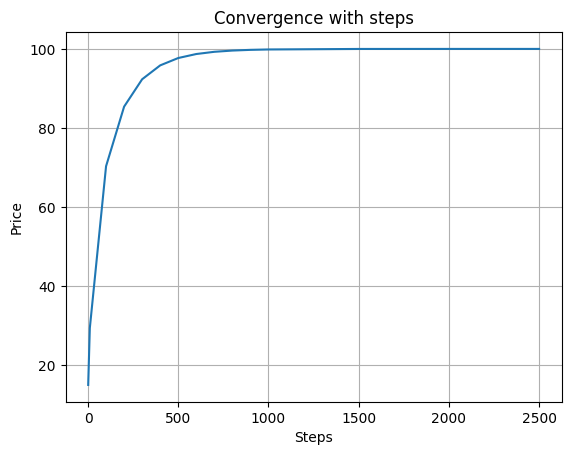

In [34]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergence with steps")
plt.xlabel("Steps")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [41]:
# Delta hedging Put Binomial tree

def binomial_put_delta(S_o, K, T, r, u, d, N):
  dt = T / N
  p = (np.exp(r * dt) - d) / (u - d)
  P = np.zeros([N + 1, N + 1])
  S = np.zeros([N + 1, N + 1])
  delta = np.zeros([N, N])

  for i in range(0, N + 1):
    P[N, i] = max(K - (S_o * (u ** (i)) * (d ** (N-i))), 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return P[0, 0], P, S, delta

In [42]:
price, put, S, delta = binomial_put_delta(100, 90, 10, 0, 1.2, 0.8, 4)
print("Underlying: \n", S)
print("put Price: \n", put)
print("Delta: \n", delta)

Underlying: 
 [[100.     0.     0.     0.     0.  ]
 [ 80.   120.     0.     0.     0.  ]
 [ 64.    96.   144.     0.     0.  ]
 [ 51.2   76.8  115.2  172.8    0.  ]
 [ 40.96  61.44  92.16 138.24 207.36]]
put Price: 
 [[10.205  0.     0.     0.     0.   ]
 [16.84   3.57   0.     0.     0.   ]
 [26.54   7.14   0.     0.     0.   ]
 [38.8   14.28   0.     0.     0.   ]
 [49.04  28.56   0.     0.     0.   ]]
Delta: 
 [[-0.33175    0.         0.         0.       ]
 [-0.60625   -0.14875    0.         0.       ]
 [-0.9578125 -0.371875   0.         0.       ]
 [-1.        -0.9296875  0.         0.       ]]


In [43]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
  price, call, S, delta = binomial_put_delta(100, 90, 10, 0, 1.2, 0.8, N)
  price_array.append(price)
  print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 5.00
With N =  10, the price is 19.38
With N = 100, the price is 60.32
With N = 200, the price is 75.40
With N = 300, the price is 82.33
With N = 400, the price is 85.84
With N = 500, the price is 87.70
With N = 600, the price is 88.71
With N = 700, the price is 89.27
With N = 800, the price is 89.58
With N = 900, the price is 89.76
With N = 1000, the price is 89.86
With N = 1500, the price is 89.99
With N = 2000, the price is 90.00
With N = 2500, the price is 90.00


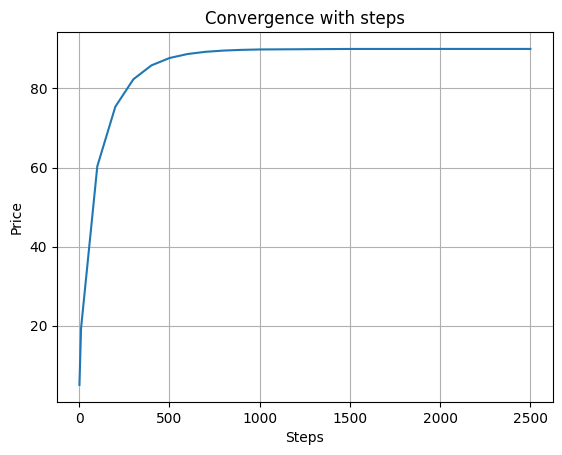

In [44]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergence with steps")
plt.xlabel("Steps")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [50]:
# Adjusting Volatility Call option

def call_option_delta(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return C[0, 0], C, S, delta

In [51]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S, delta = call_option_delta(100, 90, 1, 0, 0.3, N)
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


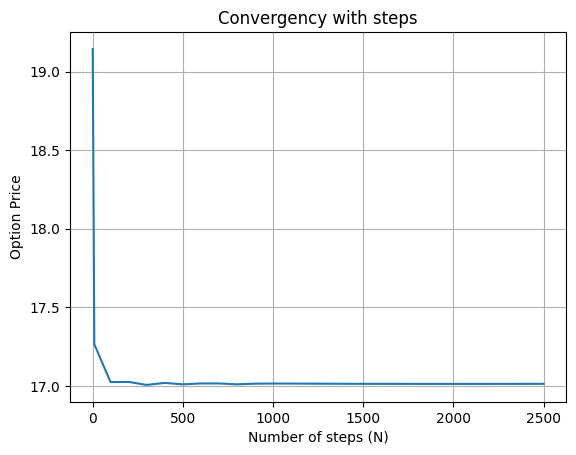

In [52]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [53]:
# Adjusting Volatility put option

def put_option_delta(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  P = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N+1):
    C[N, i] = max(K - (S_o * (u ** (i)) * (d ** (N-i))), 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * P[j+1, i+1] + (1-p) * P[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return P[0, 0], P, S, delta

In [54]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    put_price, P, S, delta = put_option_delta(100, 90, 1, 0, 0.3, N)
    price_array.append(put_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, put_price))

With N =   1, the price is 0.00
With N =  10, the price is 0.00
With N = 100, the price is 0.00
With N = 200, the price is 0.00
With N = 300, the price is 0.00
With N = 400, the price is 0.00
With N = 500, the price is 0.00
With N = 600, the price is 0.00
With N = 700, the price is 0.00
With N = 800, the price is 0.00
With N = 900, the price is 0.00
With N = 1000, the price is 0.00
With N = 1500, the price is 0.00
With N = 2000, the price is 0.00
With N = 2500, the price is 0.00


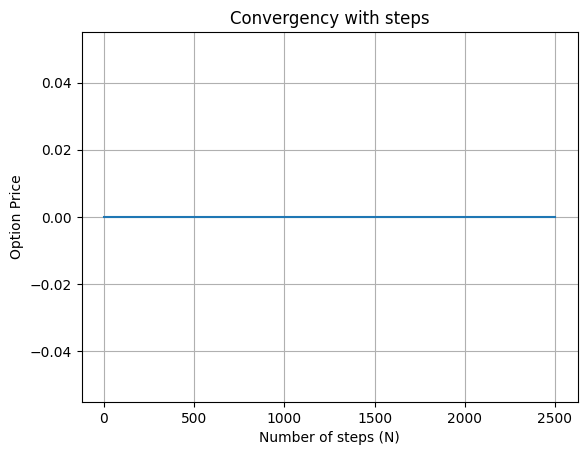

In [55]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()